In [1]:
import sys

import pandas as pd

from text_metrics import words_count, tech_words_count, negative_answers_count

sys.path.append("..")  # to make utils importable
import utils.data_worker
import utils.consts

Описание полей: <br>
OwnerUserId поста это Id юзера <br>
PostTypeId 1 или 2 - 1 это вопрос, 2 это ответ <br>
ParentId ответа это Id вопроса


In [2]:
posts = utils.data_worker.load_dataset(utils.consts.POSTS_DATA_PATH, debug_slice=False)
users = utils.data_worker.load_dataset(utils.consts.USERS_DATA_PATH, debug_slice=False)

INFO: Loading dataset ../data/Posts.xml...
INFO: Loading dataset ../data/Users.xml...


In [3]:
questions, answers = utils.data_worker.question_answer_split(posts)

answers.Tags.isna().sum(), answers.shape[0]

(178628, 178628)

In [4]:
posts.sample(5)

,Id,PostTypeId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,LastEditDate,...,Tags,AnswerCount,CommentCount,ClosedDate,CommunityOwnedDate,ContentLicense,ParentId,OwnerDisplayName,LastEditorDisplayName,FavoriteCount
76550,151525,2,NaN,2012-06-04T17:54:29.440,26,NaN,<p>Is your company's code in public or private...,7426.0,7426.0,2012-06-05T01:15:59.823,...,None,NaN,2,None,None,CC BY-SA 3.0,151518.0,None,None,NaN
67267,136923,2,NaN,2012-02-25T22:36:10.083,0,NaN,"<p>If your customers are not locked in, then <...",16929.0,16929.0,2012-02-25T23:19:21.197,...,None,NaN,6,None,None,CC BY-SA 3.0,136920.0,None,None,NaN
21820,51110,2,NaN,2011-02-23T20:53:37.653,0,NaN,"<p>I'd say be honest, tell them to find a prog...",NaN,NaN,None,...,None,NaN,0,None,2012-02-24T13:14:21.773,CC BY-SA 2.5,51055.0,user6791,None,NaN
194777,367027,2,NaN,2018-03-04T18:34:41.217,0,NaN,<p>From my experience that would be too much. ...,283635.0,283635.0,2018-03-04T19:04:30.227,...,None,NaN,0,None,None,CC BY-SA 3.0,366892.0,None,None,NaN
182299,348405,2,NaN,2017-05-05T06:54:29.007,6,NaN,<p>I would look at it this way:</p>\n\n<p>A me...,271525.0,1204.0,2017-05-05T22:16:35.253,...,None,NaN,2,None,None,CC BY-SA 3.0,348404.0,None,None,NaN


In [5]:
users.sample(5)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,AccountId
250854,294009,101,2018-01-22T13:17:36.480,Nino DELCEY,2023-03-20T22:04:49.100,None,None,None,1,0,0,5459916.0
95297,124208,101,2014-03-21T19:12:14.910,derelict,2023-01-18T21:09:45.067,None,None,None,0,0,0,2020800.0
180615,227928,101,2016-05-11T01:56:44.717,gmfm,2023-01-18T20:54:41.207,None,"San Diego, CA, United States",None,1,3,0,8106540.0
284402,340189,101,2019-07-04T11:20:37.673,Emperor,2024-02-07T12:56:58.257,None,None,None,0,0,0,13894845.0
63487,72325,135,2012-11-11T10:05:34.440,Rob W,2017-06-13T08:53:11.150,https://robwu.nl/,The Netherlands,NaN,14,7,0,902274.0


In [6]:
posts.dropna(subset=["Body"], inplace=True, axis=0)
posts["Body"] = posts["Body"].apply(utils.data_worker.html_to_str)

C:\Users\setday\AppData\Local\Temp\ipykernel_27216\2192705492.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(row_html, "html.parser")


In [7]:
posts.Body

0         A coworker of mine believes that  any  use of ...
1         Ideally, code should be so well coded that it ...
2         When starting a project for a company that's n...
3         I think the answer is the usual "It depends" o...
4         Sometimes, the things I have to do for my job ...
                                ...                        
244061    I have a NextJS app for which I want to cache ...
244062    The solution is to do the rendering on the ser...
244063    I have a "Games" API which retrieves video gam...
244064    The idea is to have multiple generic endpoints...
244065    Your assumption that you always need all the d...
Name: Body, Length: 243622, dtype: object

In [8]:
assert answers.AcceptedAnswerId.isna().sum() == answers.shape[0]
print(f"number of samples for questions {questions.shape[0]}, answers {answers.shape[0]}")

number of samples for questions 63423, answers 178628


In [9]:
answers = answers.dropna(subset=["ParentId", "OwnerUserId", "Score"])
answers.shape[0]

171806

In [10]:
questions["words_cnt"] = words_count(questions["Body"])
questions["tech_words_cnt"] = tech_words_count(questions["Body"])
questions["negative_answers"] = negative_answers_count(questions, answers, 0)

C:\Users\setday\AppData\Local\Temp\ipykernel_27216\12509712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions["words_cnt"] = words_count(questions["Body"])
C:\Users\setday\AppData\Local\Temp\ipykernel_27216\12509712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions["tech_words_cnt"] = tech_words_count(questions["Body"])
C:\Users\setday\AppData\Local\Temp\ipykernel_27216\12509712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [11]:
questions.negative_answers.value_counts()

negative_answers
0     59084
1      3660
2       506
3        99
4        40
5        13
6        12
7         5
13        1
8         1
9         1
17        1
Name: count, dtype: int64

<Axes: >

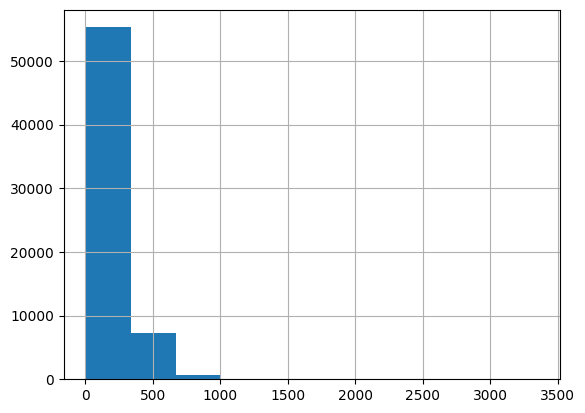

In [12]:
questions.words_cnt.hist()

In [13]:
questions.tech_words_cnt.value_counts()

tech_words_cnt
0      26209
1      10580
2       7259
3       4969
4       3549
5       2654
6       1982
7       1455
8       1102
9        805
10       608
11       442
12       402
13       291
14       215
15       182
16       132
17        98
18        78
19        66
20        50
22        38
21        37
23        35
24        32
27        21
25        18
26        17
29        16
31        11
28         8
32         6
34         6
30         6
35         5
36         5
40         5
33         4
39         4
48         3
47         2
38         2
44         2
49         2
37         2
46         2
106        1
45         1
41         1
50         1
42         1
94         1
Name: count, dtype: int64

Добавим флаги по посчитанным метрикам

In [14]:
rating_barrier = -1
len_barrier = 50
tech_words_barrier = 3
questions["is_dummy"] = (questions["Score"] <= rating_barrier) | (questions["words_cnt"] <= len_barrier) | (questions["tech_words_cnt"] <= tech_words_barrier)

C:\Users\setday\AppData\Local\Temp\ipykernel_27216\3366938931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions["is_dummy"] = (questions["Score"] <= rating_barrier) | (questions["words_cnt"] <= len_barrier) | (questions["tech_words_cnt"] <= tech_words_barrier)


In [15]:
len_barrier = 350
questions["is_complex"] = (questions["Score"] > rating_barrier) & (questions["words_cnt"] >= len_barrier) & (questions["tech_words_cnt"] > tech_words_barrier)  # & (questions["negative_answers"] >= 2)

C:\Users\setday\AppData\Local\Temp\ipykernel_27216\3150892594.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  questions["is_complex"] = (questions["Score"] > rating_barrier) & (questions["words_cnt"] >= len_barrier) & (questions["tech_words_cnt"] > tech_words_barrier)  # & (questions["negative_answers"] >= 2)


In [16]:
questions.is_dummy.value_counts()

is_dummy
True     49978
False    13445
Name: count, dtype: int64

In [17]:
questions.is_complex.value_counts()

is_complex
False    59722
True      3701
Name: count, dtype: int64

Если учесть наличие `negative_answers`, то количество `complex` вопросов падает до 70 =[

In [18]:
questions[questions["is_dummy"] & questions["is_complex"]].shape[0]  # чекаем, что нет пересечения

0

In [20]:
questions.to_csv("../data/cache/prepared_questions_metrics.csv", index=False)

In [21]:
answers.to_csv("../data/cache/prepared_answers_metrics.csv", index=False)